# Barycenter DTW

In [1]:
import pandas as pd
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
from scipy.interpolate import interp1d
import numpy as np
import import_ipynb
import matplotlib.pyplot as plt


In [12]:
from ExtractShapelets import vector_accer, find_represt_shapelet

### Find representative shapelet

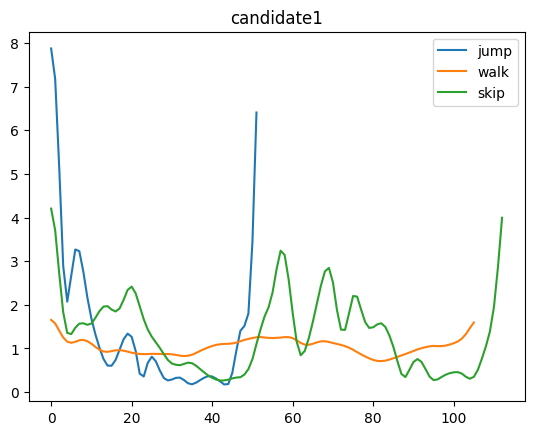

In [18]:
#Jump
z_jump = vector_accer("zqw\zqwjumpRAW.csv")['vm'][250:1800]
 # One cycle of walk and skip include 2 cycle of jump, so set the jump shapelet to 2 rounds
z_jump_rs = find_represt_shapelet(z_jump, min_dist=50, thres=0.99, max_dist=60)

# Walk
z_walk = vector_accer("zqw\zqwwalkRAW.csv")['vm'][0: 5400]
z_walk_rs = find_represt_shapelet(z_walk, min_dist=100, thres=0.95, max_dist=120)

# skip
z_skip = vector_accer("zqw\zqwskipRAW.csv")['vm'][0: 2700]
z_skip_rs = find_represt_shapelet(z_skip, min_dist=100, thres=0.8, max_dist=120)

plt.plot(z_jump_rs, label='jump')
plt.plot(z_walk_rs, label='walk')
plt.plot(z_skip_rs, label='skip')
plt.title('candidate1')
plt.legend()
plt.show()

In [24]:
# Use %store to store the variable
%store z_jump_rs
%store z_walk_rs
%store z_skip_rs
%store z_skip
%store z_walk
%store z_jump

Stored 'z_jump_rs' (ndarray)
Stored 'z_walk_rs' (ndarray)
Stored 'z_skip_rs' (ndarray)
Stored 'z_skip' (Series)
Stored 'z_walk' (Series)
Stored 'z_jump' (Series)


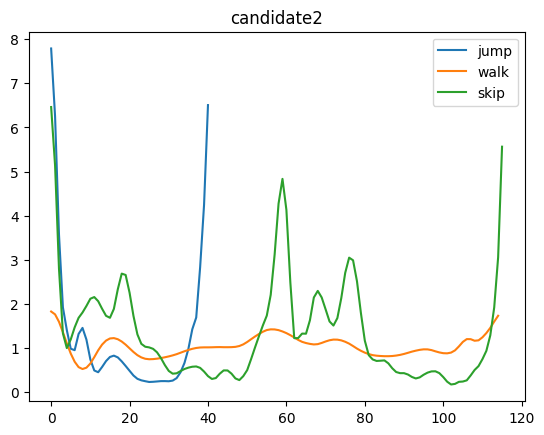

In [22]:
#Jump
g_jump = vector_accer("gbq\gbqjump.csv")['vm'][100:1800]
 # One cycle of walk and skip include 2 cycle of jump, so set the jump shapelet to 2 rounds
g_jump_rs = find_represt_shapelet(g_jump, min_dist=40, thres=0.9, max_dist=60)

# Walk
g_walk =  vector_accer("gbq\gbqwalk.csv")['vm'][300: 5000]
g_walk_rs = find_represt_shapelet(g_walk, min_dist=100, thres=0.95, max_dist=120)

# skip
g_skip = vector_accer("gbq\gbqskip.csv")['vm'][150: 1750]
g_skip_rs = find_represt_shapelet(g_skip, min_dist=100, thres=0.8, max_dist=120)

plt.plot(g_jump_rs, label='jump')
plt.plot(g_walk_rs, label='walk')
plt.plot(g_skip_rs, label='skip')
plt.title('candidate2')
plt.legend()
plt.show()

In [25]:
%store g_jump_rs
%store g_walk_rs
%store g_skip_rs
%store g_skip
%store g_walk
%store g_jump

Stored 'g_jump_rs' (ndarray)
Stored 'g_walk_rs' (ndarray)
Stored 'g_skip_rs' (ndarray)
Stored 'g_skip' (Series)
Stored 'g_walk' (Series)
Stored 'g_jump' (Series)


In [5]:
# Function to resample a sequence to a target length
def resample_sequence(sequence, target_length):
    x = np.linspace(0, 1, len(sequence))
    f = interp1d(x, sequence, kind='linear', fill_value='extrapolate')
    x_new = np.linspace(0, 1, target_length)
    return f(x_new)

# Function to calculate the barycenter sequence using DTW
def barycenter_dtw(df1, df2):
    # Resample the longer sequence to the length of the shorter one
    max_length = max(len(df1), len(df2))
    df1_resampled = pd.DataFrame({col: resample_sequence(df1[col].values, max_length) for col in df1.columns})
    df2_resampled = pd.DataFrame({col: resample_sequence(df2[col].values, max_length) for col in df2.columns})

    # _, path = fastdtw(df1_resampled.values, df2_resampled.values, dist=euclidean)

    # Use the alignment path to calculate the barycenter sequence
    barycenter_seq = df1_resampled.values + df2_resampled.values
    barycenter_seq /= 2

    # Convert the barycenter sequence back to DataFrame
    barycenter_df = pd.DataFrame(barycenter_seq, columns=df1.columns)

    return barycenter_df

def visual_shapelet(jump, walk, skip):
    """
    This is a method to visualiz the barycenter dtw shapelet and skip representative shapelet 

    :jump: is jump representative shapelet
    :walk: is walk representative shapelet
    :skip: is skip representative shapelet
    """
    df1 = pd.DataFrame(walk)
    # double the jump shapelets, because one cycle of walk and skip is two cycle of jump
    df2 = pd.concat([pd.DataFrame(jump), pd.DataFrame(jump)], ignore_index=True)
    barycenter_df = barycenter_dtw(df1, df2)
    plt.plot(barycenter_df, label='walk and jump barycenter dtw')
    plt.plot(skip, label='skip' )
    plt.legend()
    plt.show()
    # Distance Comparison
    distance, path = fastdtw(barycenter_df, pd.DataFrame(skip), dist=euclidean)
    print("Distance of walk_jump_barycenter with skip is:", distance)
    distance, path = fastdtw(pd.DataFrame(walk), pd.DataFrame(skip), dist=euclidean)
    print("Distance of walk with skip is:", distance)
    distance, path = fastdtw(pd.DataFrame(jump), pd.DataFrame(skip), dist=euclidean)
    print("Distance of jump with skip is:", distance)

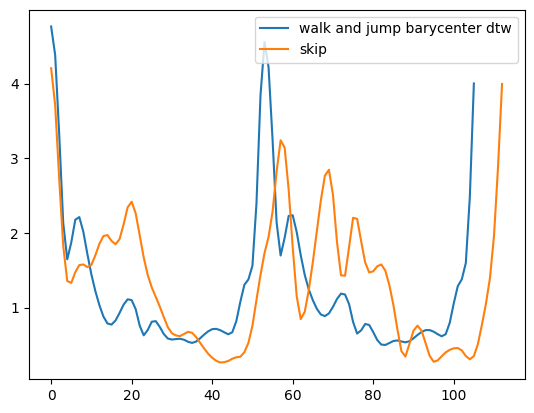

Distance of walk_jump_barycenter with skip is: 26.133046245162422
Distance of walk with skip is: 56.26958095753236
Distance of jump with skip is: 46.10194053307084


In [17]:
visual_shapelet(z_jump_rs, z_walk_rs, z_skip_rs)

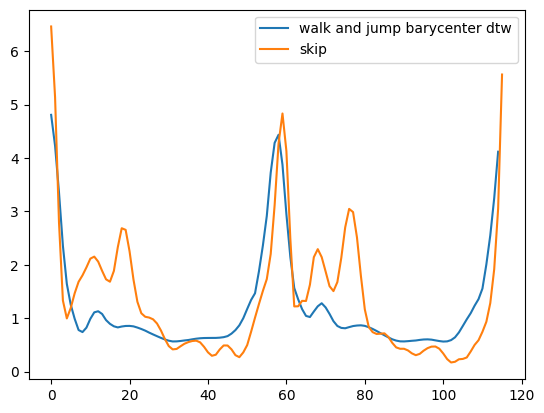

Distance of walk_jump_barycenter with skip is: 36.81881732919427
Distance of walk with skip is: 70.49681636224668
Distance of jump with skip is: 58.54349221001777


In [7]:
visual_shapelet(g_jump_rs, g_walk_rs, g_skip_rs)

## only take 5 best shapelets